In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np


[0.60167141 0.15917784 0.296994   0.59892343 0.60036806 0.14683424
 0.80544968 0.12904156 0.04435343 0.73202751 0.45099531 0.71129106
 0.96637452 0.71775408 0.38248821 0.48908072 0.06655697 0.21934851
 0.85024421 0.80805748 0.26264146 0.34456796 0.49947877 0.75959512
 0.43673805 0.32833639 0.7057842  0.85206632 0.00892172 0.65410216]


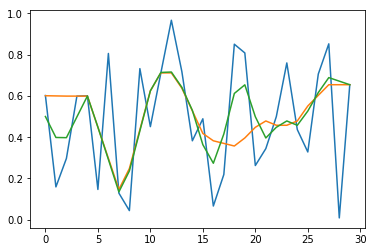

In [2]:
def smooth3s(x):
    if len(x) <= 2:
        return x
    y = np.empty_like(x)
    y[0], y[-1] = x[0], x[-1]
    for j in xrange(1,len(x)-1):
        y[j] = np.median(x[j-1:j+2])
    z = np.empty_like(y)
    z[0], z[-1] = (2*y[0]+y[1])/3, (2*y[-1]+y[-2])/3
    z[1:-1] = (y[1:-1] + y[:-2] + y[2:])/3
    return z

def smooth353(x):
    if len(x) <= 2:
        return x

    y3 = np.empty_like(x)
    y3[0], y3[-1] = x[0], x[-1]
    for j in xrange(1,len(x)-1):
        y3[j] = np.median(x[j-1:j+2])
        
    if len(y3) >= 5:
        y5 = np.empty_like(y3)
        y5[:2] = y3[:2]
        y5[-2:] = y3[-2:]
        for j in xrange(2,len(y3)-2):
            y5[j] = np.median(y3[j-2:j+3])
        y3[0], y3[-1] = y5[0], y5[-1]
        for j in xrange(1,len(x)-1):
            y3[j] = np.median(y5[j-1:j+2])

    return y3

def smooth353s(x):
    if len(x) < 3:
        return x
    
    x353 = smooth353(x)
    s = np.empty_like(x353)
    s[0], s[-1] = (2*x353[0]+x353[1])/3, (2*x353[-1]+x353[-2])/3
    s[1:-1] = (x353[1:-1] + x353[:-2] + x353[2:])/3
    
    return s
    

x= np.random.random((30,))
print x
plt.plot(x)
plt.plot(smooth353s(x))
plt.plot(smooth3s(x))

In [11]:
def plot(filename="run_log.csv"):
    df=pd.read_csv(filename)
    x=df["episodes"].values[:200]
    d=df["mean_reward_diff"].values[:200]
    ma=df["mean_max"].values[:200]
    mi=df["mean_min"].values[:200]

    #plt.subplot(121)
    #plt.plot(x,d, ls="None", marker=".")
    #plt.plot(x,smooth353s(d))
    
    plt.plot(x,mi, ls="None", marker=".")
    plt.plot(x,smooth353s(mi))
    plt.plot(x,ma, ls="None", marker=".")
    plt.plot(x,smooth353s(ma))
    plt.grid()



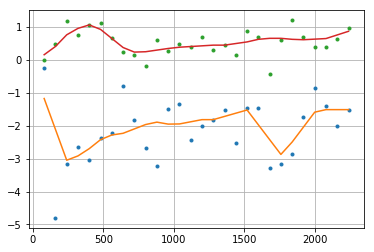

In [29]:
plot()